# Tugas 1 Visualisasi Data

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import itertools as product
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.pyplot import pie, axis, show

In [2]:
df = pd.read_csv("C:/Users/Rania Yunaningrum/OneDrive/Dokumen/SMT 6/DATMIN/STUDENT CONSUMPTION ALCOHOL/student-mat.csv")
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [18]:
df.describe(exclude = [object])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
df.describe(exclude=[np.number]) 

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


# SEX PROPORTION

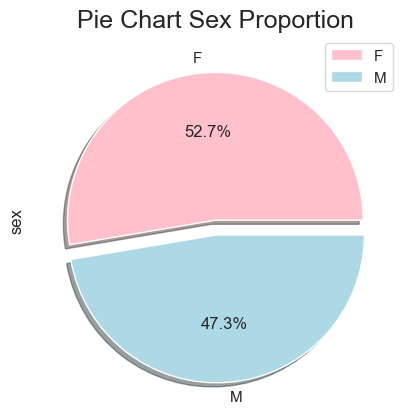

In [32]:
colors=('pink','lightblue')
explode=(0,0.1)
type=df['sex'].value_counts()
type.plot.pie(autopct='%1.1f%%',shadow=True,colors=colors,explode=explode) 
plt.title('Pie Chart Sex Proportion',fontsize=18)
plt.legend()

# HEATMAP

In [61]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='m')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for School Alcohol Consumption ', fontsize=15)
    plt.show()

C:\Users\Rania Yunaningrum\AppData\Local\Temp\ipykernel_24732\3892853522.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



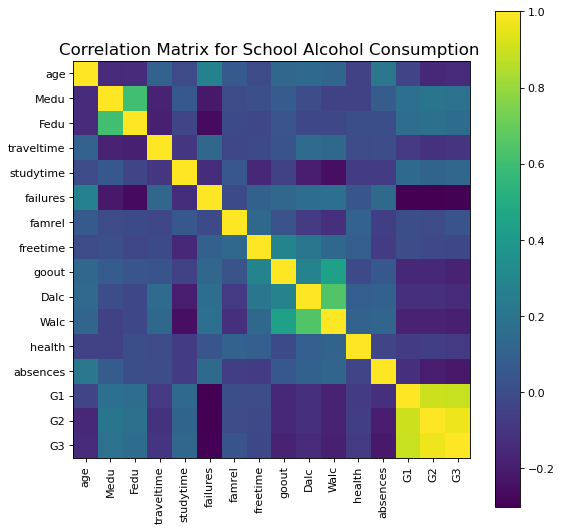

In [62]:
plotCorrelationMatrix(df, 8)

# Scatter Plot

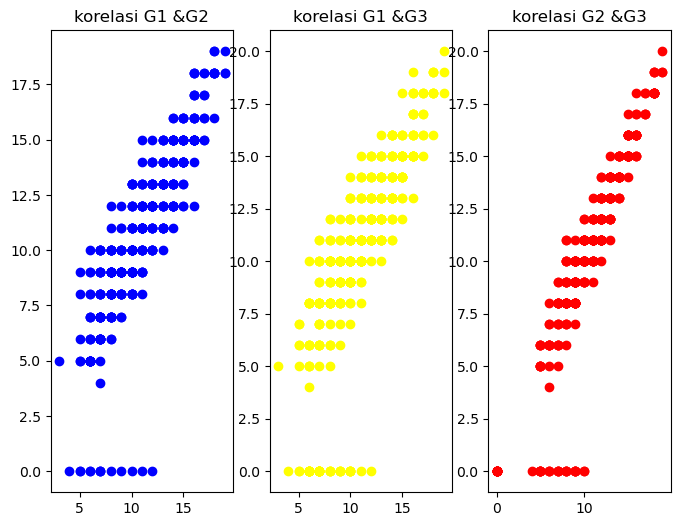

In [24]:
y1 = df['G1']
y2 = df['G2']
y3 = df['G3']

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.scatter(y1,y2,c="blue")
ax2.scatter(y1,y3,c="yellow")
ax3.scatter(y2,y3,c="red")
ax1.set_title ("korelasi G1 &G2")
ax2.set_title ("korelasi G1 &G3")
ax3.set_title ("korelasi G2 &G3")
plt.show()


Pstatus   A    T
Walc            
1        20  131
2         6   79
3         3   77
4         8   43
5         4   24


(<Figure size 640x480 with 3 Axes>,
 {('1', 'A'): (0.0, 0.0, 0.37478282452221395, 0.13201029680315066),
  ('1', 'T'): (0.0,
   0.13533255593936327,
   0.37478282452221395,
   0.8646674440606367),
  ('3', 'A'): (0.37968478530652766,
   0.0,
   0.19856043683296104,
   0.03737541528239202),
  ('3', 'T'): (0.37968478530652766,
   0.04069767441860465,
   0.19856043683296104,
   0.9593023255813953),
  ('2', 'A'): (0.5831471829238024,
   0.0,
   0.21097046413502113,
   0.07035372288450263),
  ('2', 'T'): (0.5831471829238024,
   0.07367598202071525,
   0.21097046413502113,
   0.9263240179792847),
  ('4', 'A'): (0.7990196078431373,
   0.0,
   0.12658227848101256,
   0.15634160641000586),
  ('4', 'T'): (0.7990196078431373,
   0.15966386554621848,
   0.12658227848101256,
   0.8403361344537814),
  ('5', 'A'): (0.9305038471084636,
   0.0,
   0.0694961528915364,
   0.14238253440911247),
  ('5', 'T'): (0.9305038471084636,
   0.1457047935453251,
   0.0694961528915364,
   0.8542952064546749)})

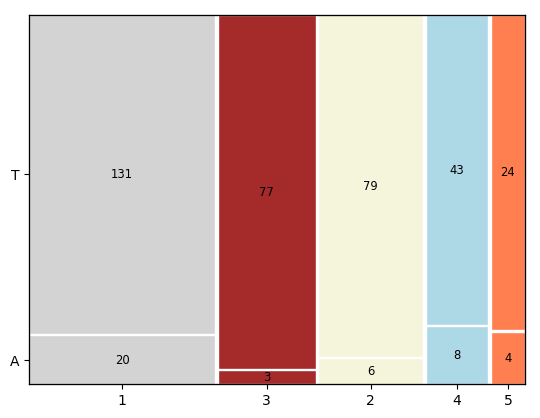

In [29]:
crosstable=pd.crosstab(df['Walc'],df['Pstatus'])
print(crosstable)
props={}
props[('1','A')]={'facecolor':'lightgray', 'edgecolor':'white'}
props[('1','T')]={'facecolor':'lightgray', 'edgecolor':'white'}
props[('2','A')]={'facecolor':'beige', 'edgecolor':'white'}
props[('2','T')]={'facecolor':'beige', 'edgecolor':'white'}
props[('3','A')]={'facecolor':'brown', 'edgecolor':'white'}
props[('3','T')]={'facecolor':'brown', 'edgecolor':'white'}
props[('4','A')]={'facecolor':'lightblue', 'edgecolor':'white'}
props[('4','T')]={'facecolor':'lightblue', 'edgecolor':'white'}
props[('5','A')]={'facecolor':'coral', 'edgecolor':'white'}
props[('5','T')]={'facecolor':'coral', 'edgecolor':'white'}
labelizer=lambda k:{('1','A'):20,('1','T'):131,('2','A'):6,('2','T'):79,('3','A'):3,('3','T'):77,('4','A'):8,('4','T'):43,('5','A'):4,('5','T'):24}[k]
mosaic(df,['Walc','Pstatus'],labelizer=labelizer,properties=props)

# Histogram + KDE

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


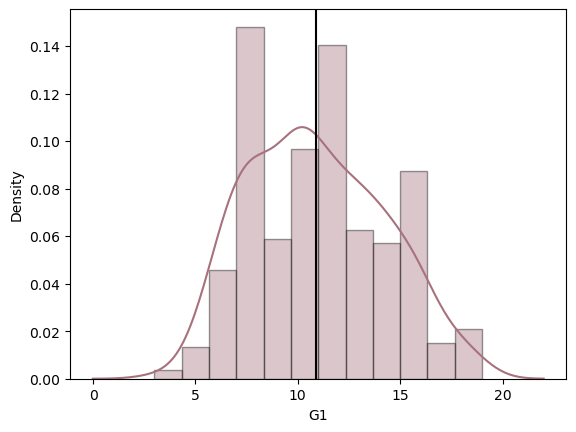

In [19]:
sns.distplot(df['G1'],
            hist = True,
            kde = True,
            color = '#A7727D',
            hist_kws = {'edgecolor' : 'black'})
plt.axvline(df['G1'].mean(),color = 'black')

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


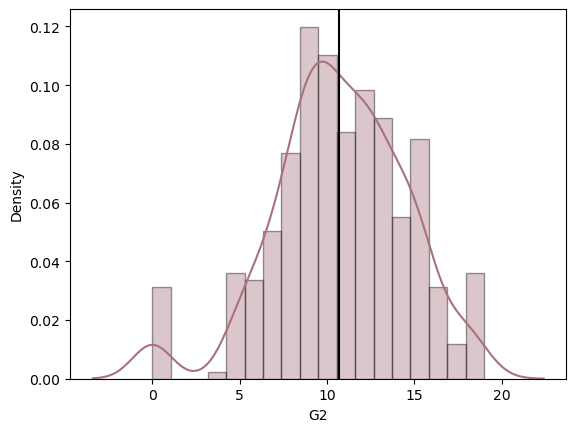

In [20]:
sns.distplot(df['G2'],
            hist = True,
            kde = True,
            color = '#A7727D',
            hist_kws = {'edgecolor' : 'black'})
plt.axvline(df['G2'].mean(),color = 'black')

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


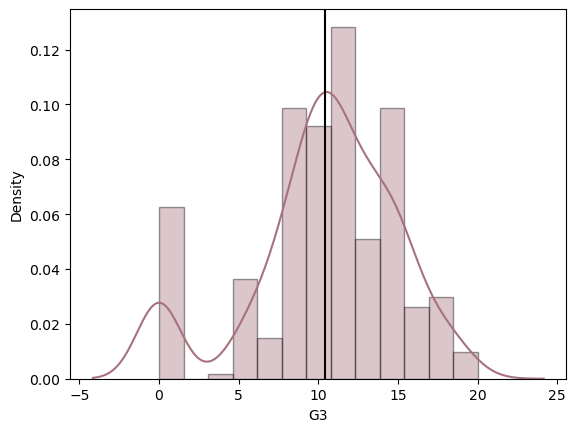

In [21]:
sns.distplot(df['G3'],
            hist = True,
            kde = True,
            color = '#A7727D',
            hist_kws = {'edgecolor' : 'black'})
plt.axvline(df['G3'].mean(),color = 'black')

NameError: name 'tips' is not defined

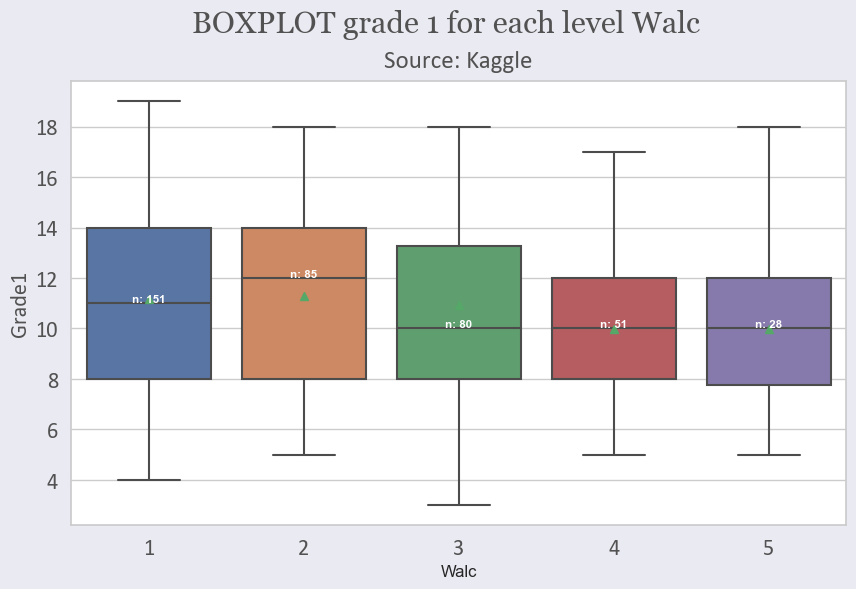

In [31]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)
ax=sns.boxplot(data=df, x='Walc', y='G1',showmeans=True,showfliers=True)

font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
ax.set_ylabel('Grade1', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
title = 'BOXPLOT grade 1 for each level Walc'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = 'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.85)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['Walc'])['G1'].median().values
nobs = df['Walc'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')
 
medians=df.groupby(['Walc'])['G1'].median()
vertical_offset = tips['G1'].median() * 0.05 
 
plt.show() 